# Задание 4 Paris
Дана выборка недвижимости в Париже в файле ParisHousing.csv

paris.zip
323 Kb
Скачать
Необходимо определить оптимальное число кластеров для данной выборки при помощи метода kMeans с использованием метода “локтя” с шагом 20

Ответ:
Например, 70

Данные

Описание полей
- Поле	Комментарий
- squareMeters	размер дома в квадратных метрах
- numberOfRooms	количество комнат в доме
- hasYardPool	есть ли в доме двор и бассейн
- floors	сколько там этажей
- cityCode	номер почтового индекса
- cityPartRange	диапазон: 0- самый дешевый, 10 - самый дорогой
- numPrevOwners	количество прежних владельцев
- made	год строительства
- isNewBuilt	это новый или отремонтированный
- hasStormProtector	имеет ли защиту от бури
- basement	наличие подвала
- attic	наличие чердака
- garage	наличие гаража
- hasStorageRoom	наличие кладовой
- hasGuestRoom	наличие гостевой комнаты
- price	цена

## Setup & Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
pathDataset = '/content/drive/MyDrive/Datasets/_Competitions/OpenDataBattle_2021'

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


## Load Data

In [ ]:
!unzip /content/drive/MyDrive/Datasets/_Competitions/OpenDataBattle_2021/paris.zip -d /content/drive/MyDrive/Datasets/_Competitions/OpenDataBattle_2021/

Archive:  /content/drive/MyDrive/Datasets/_Competitions/OpenDataBattle/paris.zip
  inflating: /content/drive/MyDrive/Datasets/_Competitions/OpenDataBattle/ParisHousing.csv  


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/_Competitions/OpenDataBattle_2021/ParisHousing.csv')
df

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,three,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,1,80771,thirty-nine,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,2,55712,fifty-eight,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard
3,3,32316,forty-seven,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,Basic,no pool and no yard
4,4,70429,nineteen,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,Luxury,has pool and has yard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1726,eighty-nine,5,73133,7,6,2009,False,True,9311,1698,218,False,4,176425.9,Basic,has pool and no yard
9996,9996,44403,twenty-nine,12,34606,9,4,1990,False,True,9061,1742,230,False,0,4448474.0,Basic,has pool and has yard
9997,9997,83841,three,69,80933,10,10,2005,True,True,8304,7730,345,True,9,8390030.5,Basic,no pool and no yard
9998,9998,59036,seventy,96,55856,1,3,2010,False,True,2590,6174,339,True,4,5905107.0,Basic,no pool and no yard


In [ ]:
df = df.drop("Unnamed: 0", axis=1)

## Explore Data

### isNull

In [ ]:
cols_with_missing = [col for col in df.columns 
                     if df[col].isnull().any()]
cols_with_missing

[]

### Categorical

In [ ]:
low_cardinality_cols = [cname for cname in df.columns if df[cname].nunique() < 10 and 
                        df[cname].dtype == "object"]
for cname in low_cardinality_cols:
  print(cname, df[cname].nunique(), df[cname].unique())

category 2 ['Basic' 'Luxury']
PoolAndYard 4 ['has pool and no yard' 'has pool and has yard' 'no pool and no yard'
 'no pool and has yard']


In [ ]:
hi_cardinality_cols = [cname for cname in df.columns if df[cname].nunique() >= 10 and 
                        df[cname].dtype == "object"]
#hi_cardinality_cols, df[hi_cardinality_cols[0]].nunique(), df[hi_cardinality_cols[0]].unique()
for cname in hi_cardinality_cols:
  print(cname, df[cname].nunique(), df[cname].unique())

numberOfRooms 100 ['three' 'thirty-nine' 'fifty-eight' 'forty-seven' 'nineteen' 'thirty-six'
 'ten' 'one hundred' 'forty-two' 'twenty-one' 'seventy-four' 'thirty-one'
 'forty-four' 'sixty' 'eighty-eight' 'thirty-seven' 'forty-three'
 'sixty-four' 'twelve' 'fifty-one' 'fifty-six' 'forty-six' 'seventy-two'
 'seven' 'ninety-eight' 'forty' 'seventy-eight' 'eighty-nine'
 'twenty-nine' 'eighty-seven' 'eight' 'twenty-seven' 'fifty-nine'
 'thirty-eight' 'forty-nine' 'sixty-six' 'twenty-two' 'ninety-seven'
 'twenty-five' 'fifty-two' 'eleven' 'six' 'eighty-two' 'seventeen'
 'fifty-seven' 'nine' 'fifteen' 'forty-eight' 'five' 'twenty-eight'
 'twenty' 'sixty-seven' 'ninety-nine' 'seventy-three' 'fifty' 'sixty-nine'
 'four' 'seventy-five' 'sixty-one' 'fifty-five' 'ninety-two'
 'twenty-three' 'ninety-three' 'seventy-one' 'thirty-five' 'ninety-four'
 'twenty-four' 'eighty-one' 'ninety-one' 'seventy-seven' 'sixty-eight'
 'seventy' 'fifty-four' 'forty-five' 'sixty-three' 'eighty-four'
 'thirty-four' 's

In [ ]:
# Get list of categorical variables
s = (df.dtypes == 'object')
print(s)
object_cols = list(s[s].index)
print(s[s].index)

print("Categorical variables:")
print(object_cols)

squareMeters         False
numberOfRooms         True
floors               False
cityCode             False
cityPartRange        False
numPrevOwners        False
made                 False
isNewBuilt           False
hasStormProtector    False
basement             False
attic                False
garage               False
hasStorageRoom       False
hasGuestRoom         False
price                False
category              True
PoolAndYard           True
dtype: bool
Index(['numberOfRooms', 'category', 'PoolAndYard'], dtype='object')
Categorical variables:
['numberOfRooms', 'category', 'PoolAndYard']


### Numeric

In [ ]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
for cname in numerical_cols:
  print(cname, df[cname].nunique(), ':', df[cname].values.min(), df[cname].values.max())

squareMeters 9483 : 89 99999
floors 100 : 1 100
cityCode 9509 : 3 99953
cityPartRange 10 : 1 10
numPrevOwners 10 : 1 10
made 32 : 1990 2021
basement 6352 : 0 10000
attic 6267 : 1 10000
garage 901 : 100 1000
hasGuestRoom 11 : 0 10
price 10000 : 10313.5 10006771.2


### Boolean

In [ ]:
bool_cols = [cname for cname in df.columns if df[cname].dtype in ['bool' ]]
bool_cols

['isNewBuilt', 'hasStormProtector', 'hasStorageRoom']

### Итого

In [ ]:
len(low_cardinality_cols), len(hi_cardinality_cols), len(numerical_cols), len(bool_cols),'=', len(low_cardinality_cols)+ len(hi_cardinality_cols) + len(numerical_cols) +len(bool_cols), '?', len(df.columns)

(2, 1, 11, 3, '=', 17, '?', 17)

## Visualise Data

### Price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


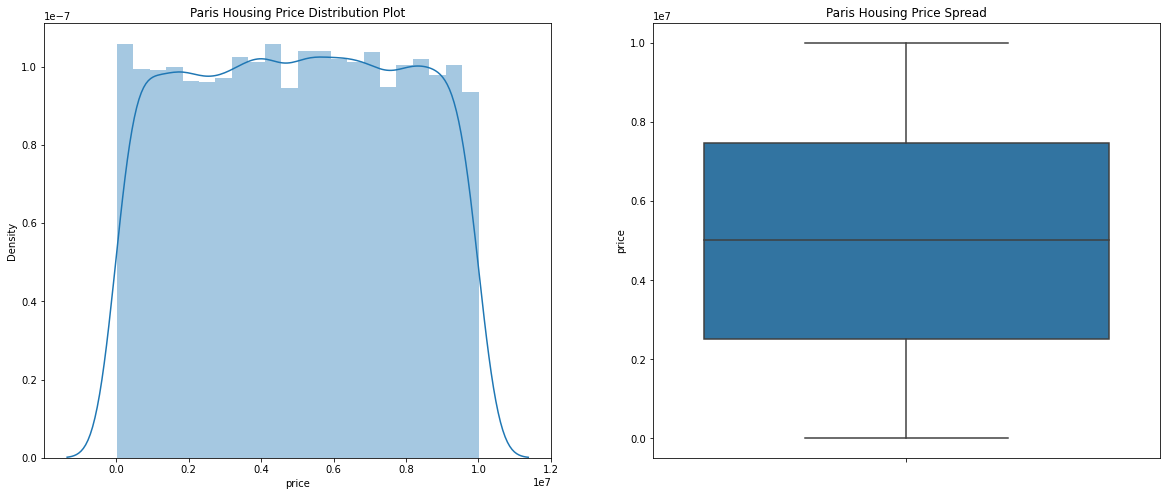

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Paris Housing Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Paris Housing Price Spread')
sns.boxplot(y=df.price)

plt.show()

### Visualise Categorical Data

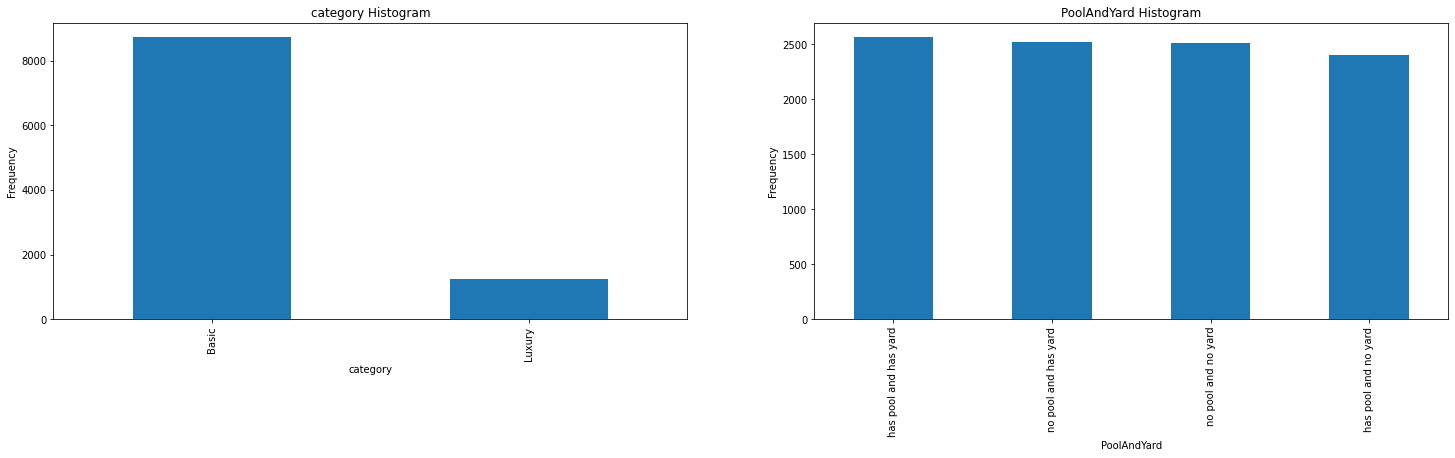

In [ ]:
plt.figure(figsize=(25, 12))
n = len(low_cardinality_cols)
for i, cname in enumerate(low_cardinality_cols):
  plt.subplot(n//2+1,2,i+1)
  #plt1 = df.model.value_counts().plot('bar')
  plt1 = df[cname].value_counts().plot(kind='bar')
  plt.title(cname + ' Histogram')
  plt1.set(xlabel = cname, ylabel='Frequency')

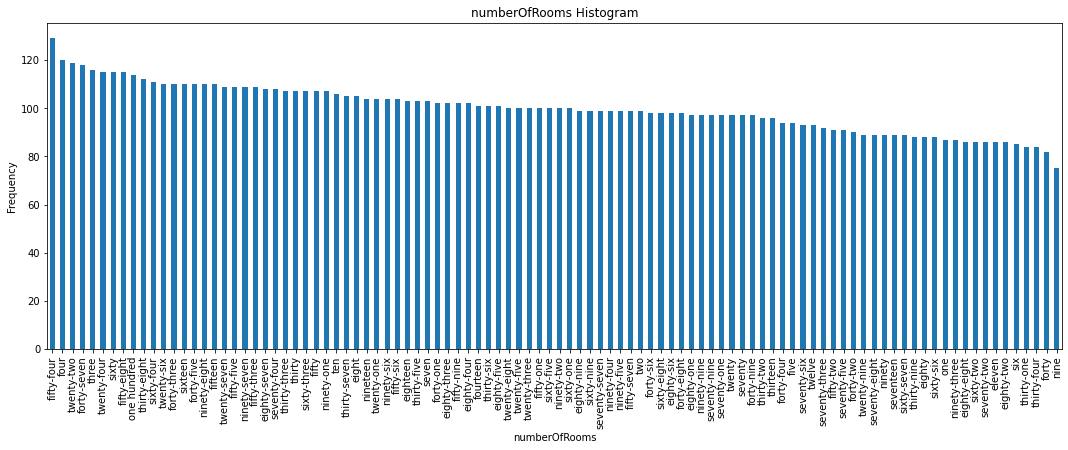

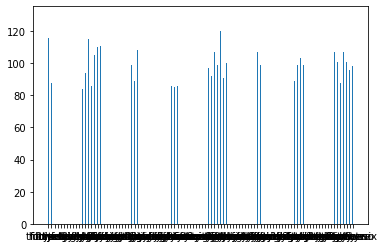

In [ ]:
plt.figure(figsize=(40, 6))
n = len(hi_cardinality_cols)
for i, cname in enumerate(hi_cardinality_cols):
  plt.subplot(n//2+1,2,i+1)
  #plt1 = df.model.value_counts().plot('bar')
  plt1 = df[cname].value_counts().plot(kind='bar')
  plt.title(cname + ' Histogram')
  plt1.set(xlabel = cname, ylabel='Frequency')
  plt.show()
  plt.hist(df[cname], bins =1000)

In [ ]:
df_lr = df[['price'] + object_cols]
df_lr.head()

,price,numberOfRooms,category,PoolAndYard
0,7559081.5,three,Basic,has pool and no yard
1,8085989.5,thirty-nine,Luxury,has pool and has yard
2,5574642.1,fifty-eight,Basic,has pool and no yard
3,3232561.2,forty-seven,Basic,no pool and no yard
4,7055052.0,nineteen,Luxury,has pool and has yard


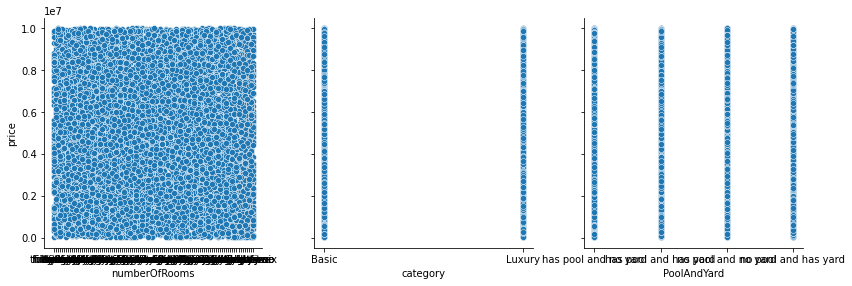

In [ ]:
def pp(x,y,z):
    #sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp(*object_cols)

### Visualise Numeric Data

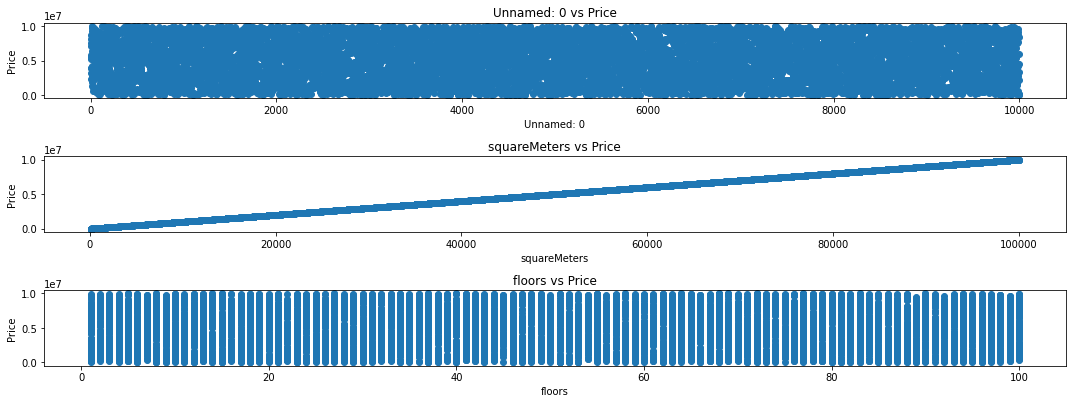

In [ ]:
plt.figure(figsize=(15, 22))
n = len(numerical_cols)
for i, cname in enumerate(numerical_cols):
  if i>2:
    break
  plt.subplot(n,1,i+1)
  plt.scatter(df[cname],df['price'])
  plt.title(cname+' vs Price')
  plt.ylabel('Price')
  plt.xlabel(cname)

plt.tight_layout()  

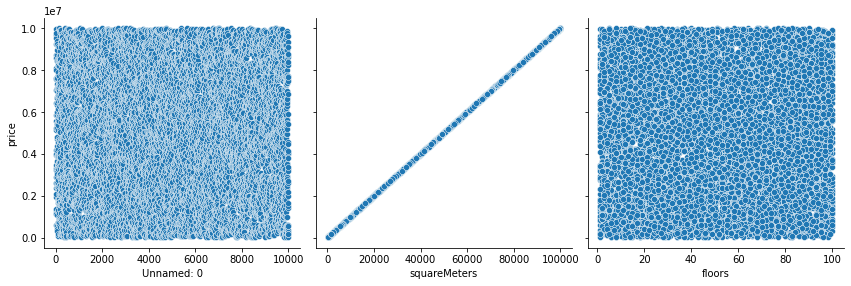

In [ ]:
def pp(x,y,z):
    #sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp(*numerical_cols[:3])

### Visualise Boolean Data

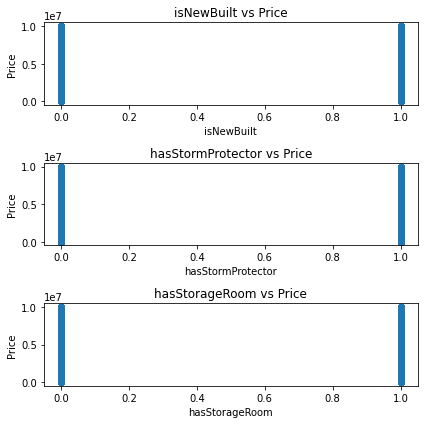

In [ ]:
plt.figure(figsize=(6, 6))
n = len(bool_cols)
for i, cname in enumerate(bool_cols):
  if i>2:
    break
  plt.subplot(n,1,i+1)
  plt.scatter(df[cname],df['price'])
  plt.title(cname+' vs Price')
  plt.ylabel('Price')
  plt.xlabel(cname)

plt.tight_layout()  

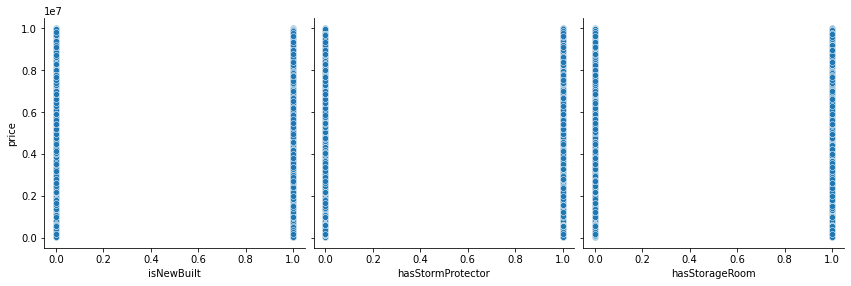

In [ ]:
def pp(x,y,z):
    #sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp(*bool_cols[:3])

## Prepare Dataset

### Replace Categorical Data

In [ ]:
# Get list of categorical variables
vals=[]
for cname in object_cols:
  print(cname, df[cname].nunique(), df[cname].unique())
  vals.append(list(df[cname].unique()))
  vals1 = list(df[cname].unique())
  df[cname+'_num'] = df.apply(lambda row: vals1.index(row[cname]),axis=1)
  # http://espressocode.top/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/
  
for v in vals:
  print(v)

numberOfRooms 100 ['three' 'thirty-nine' 'fifty-eight' 'forty-seven' 'nineteen' 'thirty-six'
 'ten' 'one hundred' 'forty-two' 'twenty-one' 'seventy-four' 'thirty-one'
 'forty-four' 'sixty' 'eighty-eight' 'thirty-seven' 'forty-three'
 'sixty-four' 'twelve' 'fifty-one' 'fifty-six' 'forty-six' 'seventy-two'
 'seven' 'ninety-eight' 'forty' 'seventy-eight' 'eighty-nine'
 'twenty-nine' 'eighty-seven' 'eight' 'twenty-seven' 'fifty-nine'
 'thirty-eight' 'forty-nine' 'sixty-six' 'twenty-two' 'ninety-seven'
 'twenty-five' 'fifty-two' 'eleven' 'six' 'eighty-two' 'seventeen'
 'fifty-seven' 'nine' 'fifteen' 'forty-eight' 'five' 'twenty-eight'
 'twenty' 'sixty-seven' 'ninety-nine' 'seventy-three' 'fifty' 'sixty-nine'
 'four' 'seventy-five' 'sixty-one' 'fifty-five' 'ninety-two'
 'twenty-three' 'ninety-three' 'seventy-one' 'thirty-five' 'ninety-four'
 'twenty-four' 'eighty-one' 'ninety-one' 'seventy-seven' 'sixty-eight'
 'seventy' 'fifty-four' 'forty-five' 'sixty-three' 'eighty-four'
 'thirty-four' 's

In [ ]:
cname = 'category'
#df['Discounted_Price'] = df.apply(lambda row: row.Cost - (row.Cost * 0.1), axis = 1)
df[cname+'_num'] = df.apply(lambda row: vals[1].index(row[cname]),axis=1)


In [ ]:
cname = 'category'
cname = 'numberOfRooms'
df[[cname, cname+'_num']]

,numberOfRooms,numberOfRooms_num
0,three,0
1,thirty-nine,1
2,fifty-eight,2
3,forty-seven,3
4,nineteen,4
...,...,...
9995,eighty-nine,27
9996,twenty-nine,28
9997,three,0
9998,seventy,71


In [ ]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange',
       'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement',
       'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price',
       'category', 'PoolAndYard', 'category_num', 'numberOfRooms_num',
       'PoolAndYard_num'],
      dtype='object')

In [ ]:
data= df.copy()
data = data.drop(object_cols, axis=1)

In [ ]:
data.columns

Index(['squareMeters', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners',
       'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic',
       'garage', 'hasStorageRoom', 'hasGuestRoom', 'price', 'category_num',
       'numberOfRooms_num', 'PoolAndYard_num'],
      dtype='object')

## Split Train Test

In [ ]:
from sklearn.model_selection import train_test_split



# Separate target from predictors
y = data.price
X = data.drop(['price'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [ ]:
print(df.price.values.min(), df.price.values.max())

10313.5 10006771.2


## Clustering

In [ ]:
from sklearn.cluster import MiniBatchKMeans, KMeans
import warnings
import time
warnings.filterwarnings("ignore") #, category=DeprecationWarning) 

cost = []
labels_ = []
#clustersCounts = [5,10,20, 100, 250, 500]
clustersCounts = [(i+1)*20 for i in range(40)]
for i in clustersCounts:
  cur_time = time.time()
  clustersCount = i #100                                # Указываем количество кластеров
  #kmean = KMeans(clustersCount)                        # Создаем объект KMeans
  kmean = MiniBatchKMeans(init='k-means++', n_clusters=clustersCount) #, batch_size=batch_size,n_init=10, max_no_improvement=10, verbose=0)
  kmean.fit(X)                                   # Производим кластеризацию набора carts01
  # не пойдет cartsIndexes, потому как он массив векторов разной длины - в каждой корзине (cart) свое количество покупок
  labels = kmean.labels_                               # Сохраняем метки в переменную labels
  labels_.append(labels)
  cost.append(kmean.inertia_)
  
  print(i, 'Время обработки: ', round(time.time() - cur_time,2),'c')
#npCarts = np.array(carts)      

20 Время обработки:  0.14 c
40 Время обработки:  0.32 c
60 Время обработки:  0.46 c
80 Время обработки:  0.62 c
100 Время обработки:  0.85 c
120 Время обработки:  0.66 c
140 Время обработки:  0.91 c
160 Время обработки:  0.98 c
180 Время обработки:  1.22 c
200 Время обработки:  1.31 c
220 Время обработки:  0.54 c
240 Время обработки:  1.49 c
260 Время обработки:  1.77 c
280 Время обработки:  1.84 c
300 Время обработки:  2.0 c
320 Время обработки:  2.24 c
340 Время обработки:  2.16 c
360 Время обработки:  0.86 c
380 Время обработки:  2.22 c
400 Время обработки:  0.84 c
420 Время обработки:  2.68 c
440 Время обработки:  2.27 c
460 Время обработки:  3.4 c
480 Время обработки:  3.03 c
500 Время обработки:  1.04 c
520 Время обработки:  2.71 c
540 Время обработки:  1.13 c
560 Время обработки:  2.6 c
580 Время обработки:  1.23 c
600 Время обработки:  3.42 c
620 Время обработки:  3.84 c
640 Время обработки:  3.54 c
660 Время обработки:  3.26 c
680 Время обработки:  1.45 c
700 Время обработки: 

### Elbow method

10000 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
10000 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] [26 10  5 ...  7 14 38]


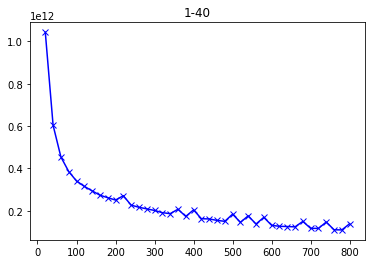

In [ ]:
print(len(labels_[0]),np.unique(np.array(labels_[0]))) #, labels_[0])
print(len(labels_[1]),np.unique(np.array(labels_[1])), labels_[1])

plt.title("1-40")
#plt.plot(range(len(cost)), cost, 'bx-')
b=0
plt.plot(np.array(range(b+1,len(cost)+b+1))*20, cost, 'bx-')

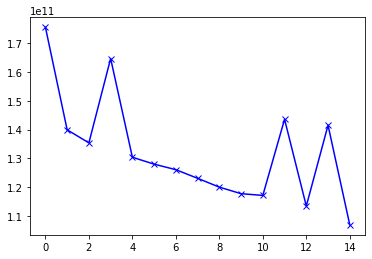

In [ ]:
plt.plot(range(len(cost)), cost, 'bx-')

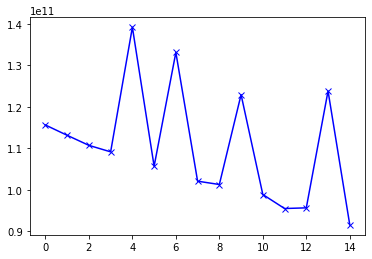

In [ ]:
plt.title("35-50")
plt.plot(range(len(cost)), np.array(cost), 'bx-')

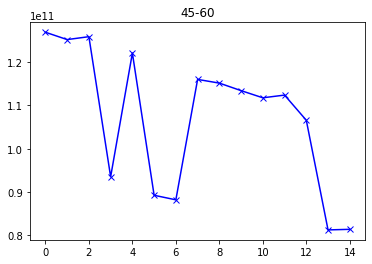

In [ ]:
plt.title("45-60")
plt.plot(range(len(cost)), np.array(cost), 'bx-')

### Проверка

In [ ]:
from sklearn.cluster import MiniBatchKMeans, KMeans
import warnings
import time
warnings.filterwarnings("ignore") #, category=DeprecationWarning) 

cost = []
labels_ = []
#clustersCounts = [5,10,20, 100, 250, 500]
clustersCounts = [(i+1)*20 for i in range(35,45)]
for i in clustersCounts:
  cur_time = time.time()
  clustersCount = i #100                                # Указываем количество кластеров
  kmean = KMeans(clustersCount)                        # Создаем объект KMeans
  #kmean = MiniBatchKMeans(init='k-means++', n_clusters=clustersCount) #, batch_size=batch_size,n_init=10, max_no_improvement=10, verbose=0)
  kmean.fit(X)                                   # Производим кластеризацию набора carts01
  # не пойдет cartsIndexes, потому как он массив векторов разной длины - в каждой корзине (cart) свое количество покупок
  labels = kmean.labels_                               # Сохраняем метки в переменную labels
  labels_.append(labels)
  cost.append(kmean.inertia_)
  
  print(i, 'Время обработки: ', round(time.time() - cur_time,2),'c')
#npCarts = np.array(carts)      

720 Время обработки:  23.66 c
740 Время обработки:  25.39 c
760 Время обработки:  25.86 c
780 Время обработки:  26.07 c
800 Время обработки:  26.9 c
820 Время обработки:  26.79 c
840 Время обработки:  26.07 c
860 Время обработки:  27.54 c
880 Время обработки:  27.78 c
900 Время обработки:  29.07 c


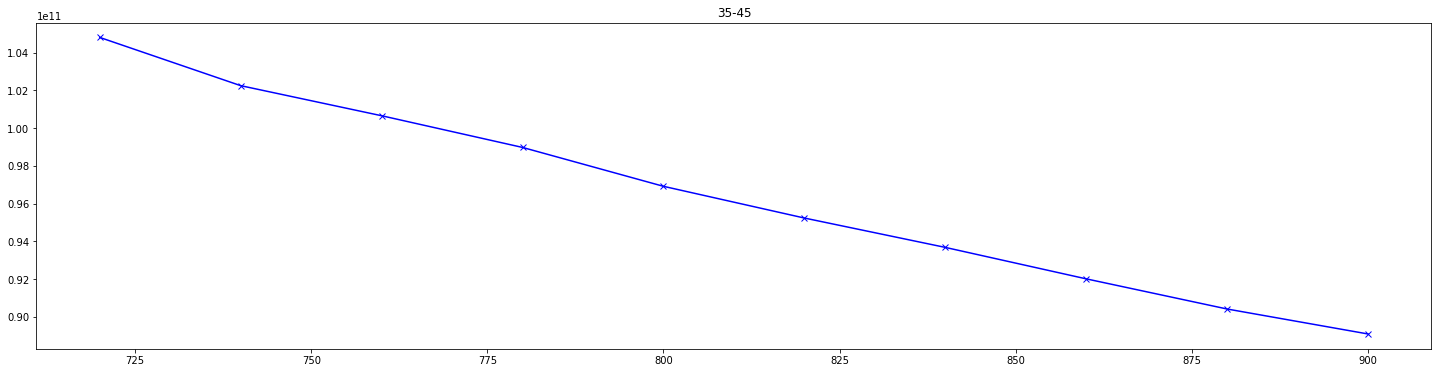

In [ ]:
plt.figure(figsize=(25,6))
plt.title("35-45")
#plt.plot(range(len(cost)), cost, 'bx-')
b=35
plt.plot(np.array(range(b+1,len(cost)+b+1))*20, cost, 'bx-')

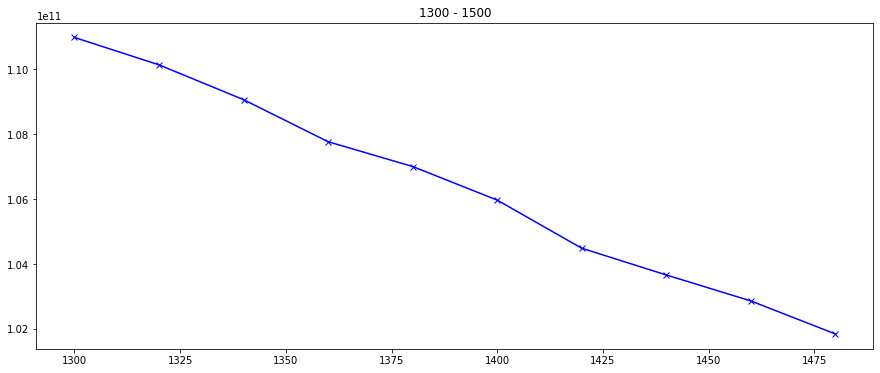

In [ ]:
plt.figure(figsize=(15,6))
plt.title(f"{b*interval} - {e*interval}")
plt.plot(np.array(range(b,len(cost)+b))*interval, cost, 'bx-')

### Еще одна проверка

In [ ]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
import warnings
import time
warnings.filterwarnings("ignore") #, category=DeprecationWarning) 

cost = []
labels_ = []
#clustersCounts = [5,10,20, 100, 250, 500]
b,e =0, 15
interval = 10
clustersCounts = [(i+1)*interval for i in range(b,e)]
for i in clustersCounts:
  cur_time = time.time()
  clustersCount = i #100                                # Указываем количество кластеров
  kmean = KMeans(init='k-means++', n_clusters=clustersCount) # Создаем объект KMeans
  #kmean = MiniBatchKMeans(init='k-means++', n_clusters=clustersCount) #, batch_size=batch_size,n_init=10, max_no_improvement=10, verbose=0)
  kmean.fit(X)                                   # Производим кластеризацию набора carts01
  # не пойдет cartsIndexes, потому как он массив векторов разной длины - в каждой корзине (cart) свое количество покупок
  labels = kmean.labels_                               # Сохраняем метки в переменную labels
  labels_.append(labels)
  cost.append(kmean.inertia_)
  
  print(i, 'Время обработки: ', round(time.time() - cur_time,2),'c')
#npCarts = np.array(carts)      

10 Время обработки:  1.0 c
20 Время обработки:  2.04 c
30 Время обработки:  2.83 c
40 Время обработки:  3.39 c
50 Время обработки:  3.8 c
60 Время обработки:  4.06 c
70 Время обработки:  4.87 c
80 Время обработки:  5.2 c
90 Время обработки:  5.08 c
100 Время обработки:  5.48 c
110 Время обработки:  6.24 c
120 Время обработки:  7.29 c
130 Время обработки:  7.43 c
140 Время обработки:  8.12 c
150 Время обработки:  8.17 c


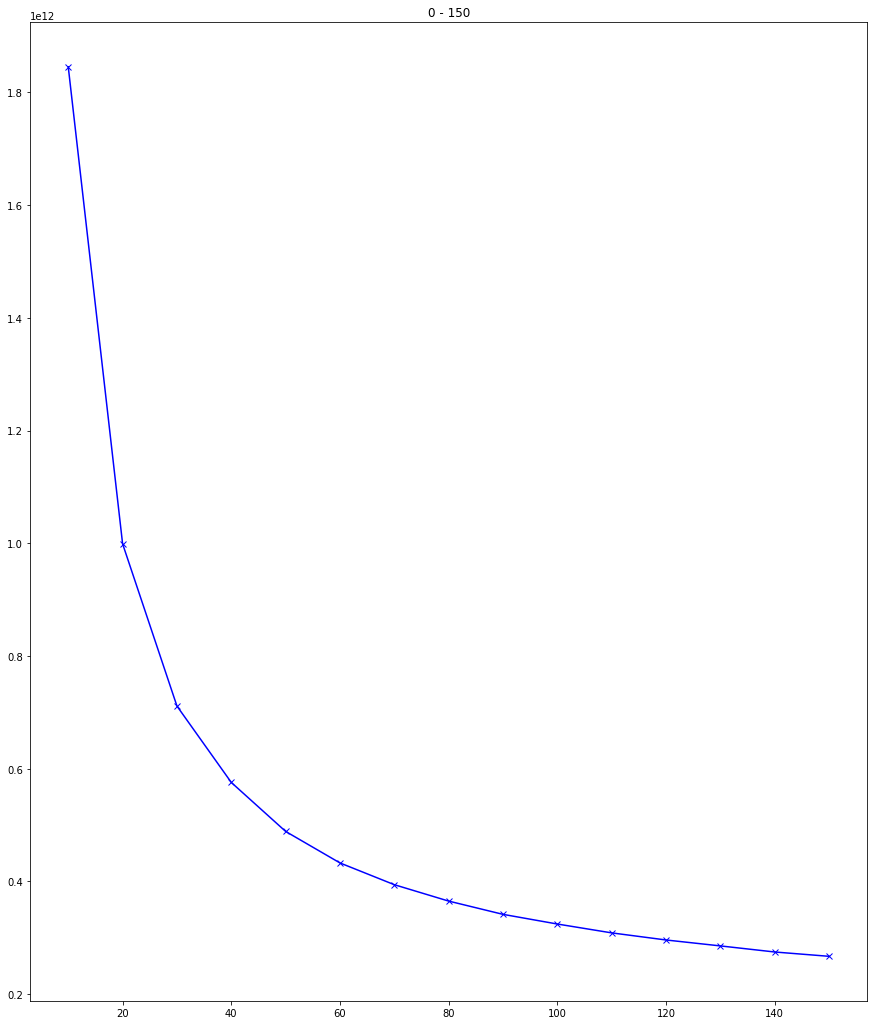

In [ ]:
plt.figure(figsize=(15,18))
plt.title(f"{b*interval} - {e*interval}")
plt.plot(np.array(range(b+1,len(cost)+b+1))*interval, cost, 'bx-')

## Правильный ответ - 40

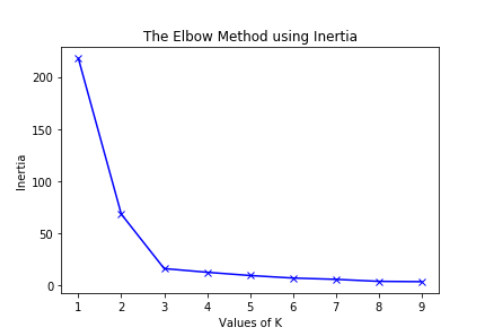

Чтобы определить оптимальное количество кластеров, мы должны выбрать значение k в «колене», то есть в точке, после которой искажение / инерция начинают линейно уменьшаться. Таким образом, для заданных данных мы приходим к выводу, что оптимальное количество кластеров для данных составляет 3 .

http://espressocode.top/elbow-method-for-optimal-value-of-k-in-kmeans/

## Silhouette & Davies-Bouldin -  еще два метод
https://habr.com/ru/company/jetinfosystems/blog/467745/

In [ ]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
import warnings
import time
warnings.filterwarnings("ignore") #, category=DeprecationWarning) 

cost = []
labels_ = []
km_silhouette = []
vmeasure_score =[]
db_score = []

#clustersCounts = [5,10,20, 100, 250, 500]
b,e = 1, 10
interval = 10
clustersCounts = [(i+1)*interval for i in range(b,e)]
for i in clustersCounts:
  cur_time = time.time()
  clustersCount = i #100                                # Указываем количество кластеров
  kmean = KMeans(init='k-means++', n_clusters=clustersCount) # Создаем объект KMeans
  #kmean = MiniBatchKMeans(init='k-means++', n_clusters=clustersCount) #, batch_size=batch_size,n_init=10, max_no_improvement=10, verbose=0)
  kmean.fit(X)                                   # Производим кластеризацию набора carts01
  preds = kmean.predict(X)
  
  labels = kmean.labels_                               # Сохраняем метки в переменную labels
  labels_.append(labels)
  cost.append(kmean.inertia_)
  
  silhouette = silhouette_score(X, preds)
  km_silhouette.append(silhouette)
  print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
  
  db = davies_bouldin_score(X, preds)
  db_score.append(db)
  print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
  
  # y = data.price
  # X = data.drop(['price'], axis=1)
  v_measure = v_measure_score(y,preds)
  vmeasure_score.append(v_measure)
  print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
  print("-"*100)

  print(i, 'Время обработки: ', round(time.time() - cur_time,2),'c')

  

Silhouette score for number of cluster(s) 20: 0.30838919920041435
Davies Bouldin score for number of cluster(s) 20: 0.8940327380811042
V-measure score for number of cluster(s) 20: 0.4903794339424156
----------------------------------------------------------------------------------------------------
20 Время обработки:  4.01 c
Silhouette score for number of cluster(s) 30: 0.28767944734119366
Davies Bouldin score for number of cluster(s) 30: 0.940795253321234
V-measure score for number of cluster(s) 30: 0.538452132038958
----------------------------------------------------------------------------------------------------
30 Время обработки:  4.29 c
Silhouette score for number of cluster(s) 40: 0.2684147990916559
Davies Bouldin score for number of cluster(s) 40: 0.9844668625822701
V-measure score for number of cluster(s) 40: 0.571300809668443
----------------------------------------------------------------------------------------------------
40 Время обработки:  4.5 c
Silhouette score for 

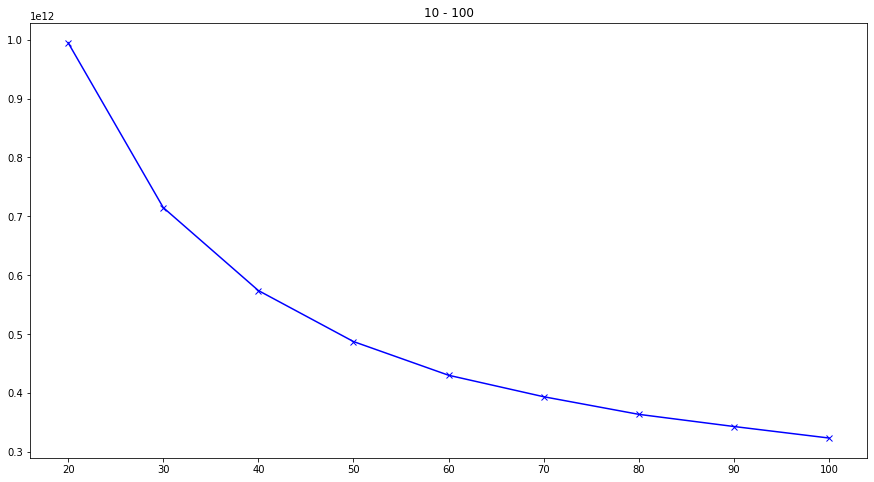

In [ ]:
plt.figure(figsize=(15,8))
plt.title(f"{b*interval} - {e*interval}")
plt.plot(np.array(range(b+1,len(cost)+b+1))*interval, cost, 'bx-')

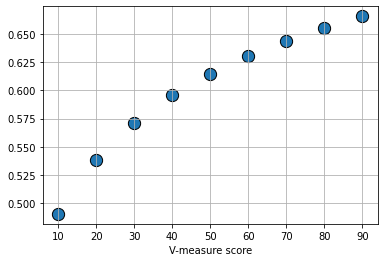

In [ ]:

plt.scatter(x=[i for i in range(b*interval,e*interval,interval)],y=vmeasure_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("V-measure score")
plt.show()

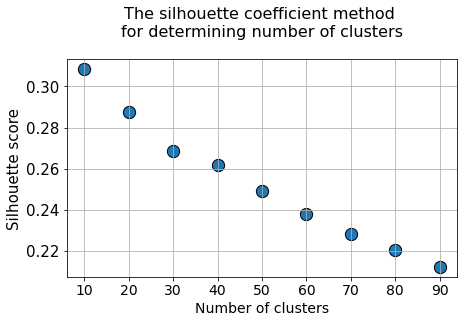

In [ ]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(b*interval,e*interval,interval)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(b*interval,e*interval,interval)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

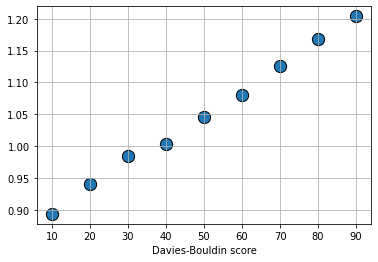

In [ ]:
plt.scatter(x=[i for i in range(b*interval,e*interval,interval)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()